In [1]:
#Подключение библеотек
import pandas 
import matplotlib.pyplot as plt
from re import sub
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
print("ok")

ok


In [2]:
#Чтение с JSON
dataset = pandas.read_json("data.json")
dataset
print("ok")

ok


In [3]:
#Удаление колонки id
dataset = dataset.drop(columns="id")
print("ok")

ok


In [4]:
#Кол-во классов в датасете
class_label_len = len(dataset["cuisine"].unique()) #подсчет классов 
print(class_label_len)

20


In [5]:
ingridient_replace = {
    "knorr": "",
    "sargento": "",
    "wishbone": "",
    "hiddenvalley": "",
    "kraft": "",
    'wasabe': 'wasabi',
    'sauc': 'sauce',
}

#Функция очистки датасета
def clear_dataframe(dataset):
    for i in range(len(dataset["ingredients"])):
        for j in range(len(dataset["ingredients"][i])): # Каждый ингридиент
            dataset["ingredients"][i][j] = sub("[^A-Za-z]", " " , dataset["ingredients"][i][j])#Оставляем все кроме букв
            dataset["ingredients"][i][j] = sub("[0-9]", " " , dataset["ingredients"][i][j])#Удаляем все цифры
            dataset["ingredients"][i][j] = dataset["ingredients"][i][j].lower()#Приводим к нижнему регистру
            for key, value in ingridient_replace.items():
                dataset["ingredients"][i][j].replace(key, value)#Убираем заменяем данные на основе списка(выше блок)
            dataset["ingredients"][i][j] = dataset["ingredients"][i][j].replace(' ', '')#
    return dataset
print("ok")

ok


In [6]:
dataset = clear_dataframe(dataset)
print("ok")

ok


ok


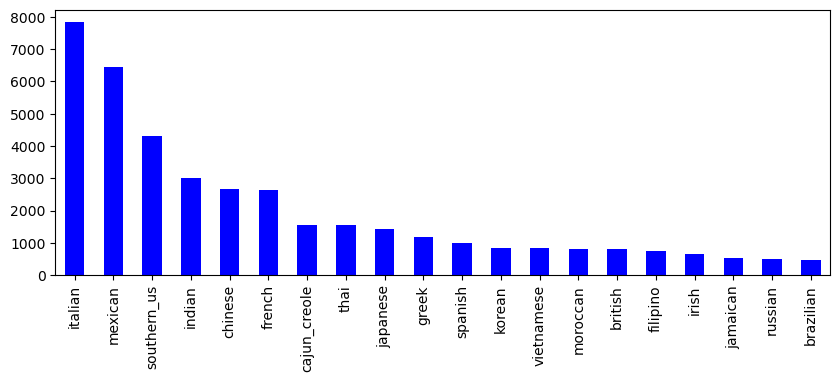

In [7]:
plt.figure(figsize = (10,20))
plt.subplot(5, 1, 1)
dataset["cuisine"].value_counts().plot.bar(color="b")
print("ok")

ok


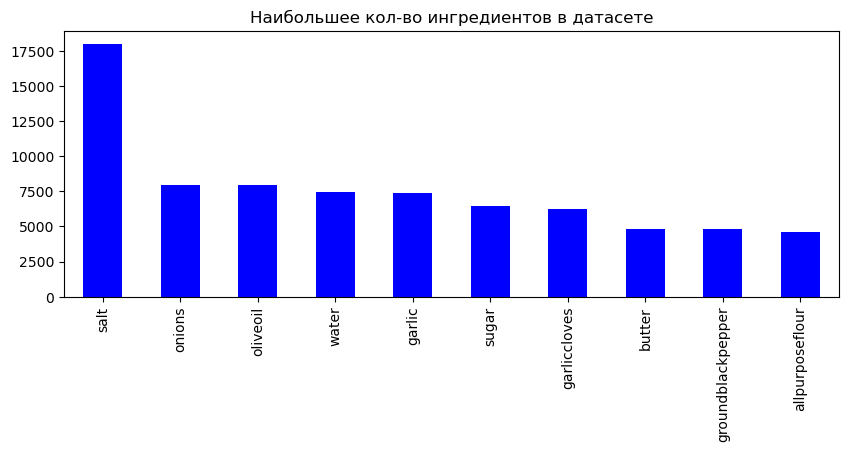

In [8]:
plt.figure(figsize = (10,20))
plt.subplot(5, 1, 2)
pandas.Series(dict(Counter(','.join(j for i in dataset["ingredients"] for j in i).split(',')))).sort_values(ascending=False).head(10).plot.bar(color="b", title="Наибольшее кол-во ингредиентов в датасете")
print("ok")

ok


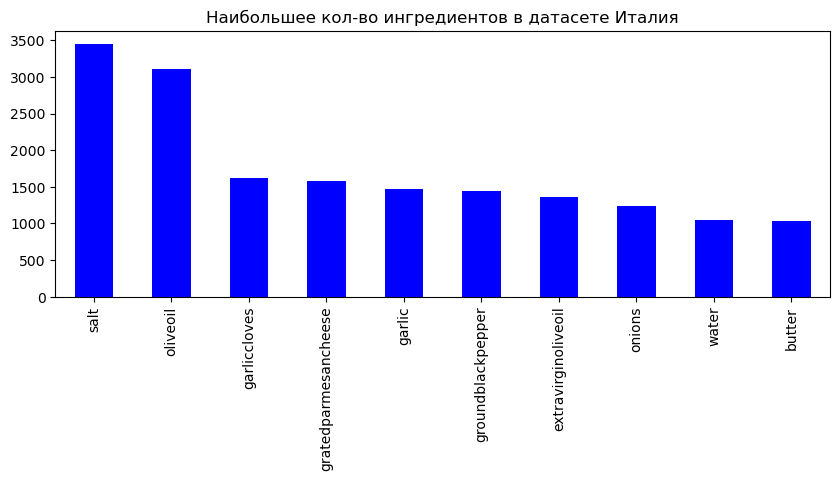

In [9]:
plt.figure(figsize = (10,20))
plt.subplot(5, 1, 3)
pandas.Series(dict(Counter(','.join(j for i in dataset.loc[dataset["cuisine"] == "italian"]["ingredients"] for j in i).split(',')))).sort_values(ascending=False).head(10).plot.bar(color="b", title="Наибольшее кол-во ингредиентов в датасете Италия")
print("ok")   

ok


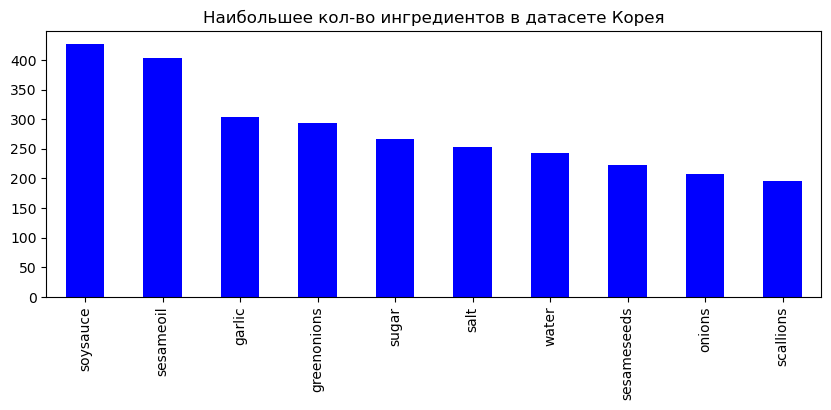

In [10]:
plt.figure(figsize = (10,20))
plt.subplot(5, 1, 4)
pandas.Series(dict(Counter(','.join(j for i in dataset.loc[dataset["cuisine"] == "korean"]["ingredients"] for j in i).split(',')))).sort_values(ascending=False).head(10).plot.bar(color="b", title="Наибольшее кол-во ингредиентов в датасете Корея")
print("ok")   

ok


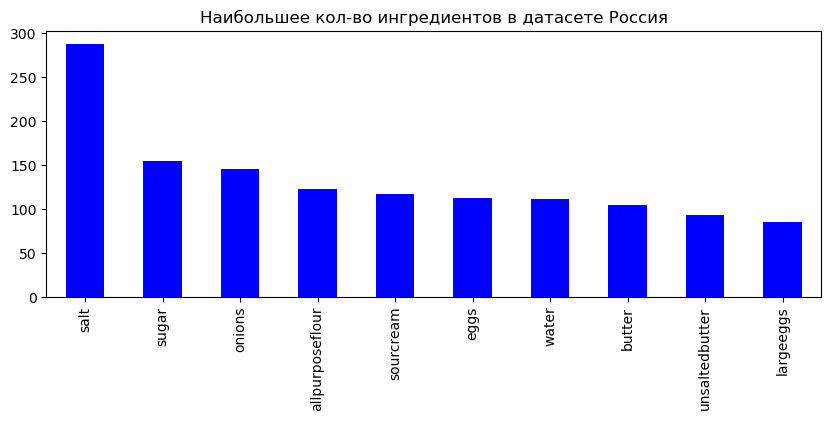

In [11]:
plt.figure(figsize = (10,20))
plt.subplot(5, 1, 5)
pandas.Series(dict(Counter(','.join(j for i in dataset.loc[dataset["cuisine"] == "russian"]["ingredients"] for j in i).split(',')))).sort_values(ascending=False).head(10).plot.bar(color="b", title="Наибольшее кол-во ингредиентов в датасете Россия")
print("ok")   

In [12]:
#Словарь {Кухня: ID}
class_label = dataset["cuisine"].unique() 
class_label = dict(zip(class_label,[i for i in range(class_label_len)])) 
print(class_label)
print("ok")

{'greek': 0, 'southern_us': 1, 'filipino': 2, 'indian': 3, 'jamaican': 4, 'spanish': 5, 'italian': 6, 'mexican': 7, 'chinese': 8, 'british': 9, 'thai': 10, 'vietnamese': 11, 'cajun_creole': 12, 'brazilian': 13, 'french': 14, 'japanese': 15, 'irish': 16, 'korean': 17, 'moroccan': 18, 'russian': 19}
ok


In [13]:
#Заменяем кухню на id
dataset["cuisine"] = dataset["cuisine"].replace((class_label))
print(dataset)
print("ok")

       cuisine                                        ingredients
0            0  [romainelettuce, blackolives, grapetomatoes, g...
1            1  [plainflour, groundpepper, salt, tomatoes, gro...
2            2  [eggs, pepper, salt, mayonaise, cookingoil, gr...
3            3                 [water, vegetableoil, wheat, salt]
4            3  [blackpepper, shallots, cornflour, cayennepepp...
...        ...                                                ...
39769       16  [lightbrownsugar, granulatedsugar, butter, war...
39770        6  [kraftzestyitaliandressing, purpleonion, brocc...
39771       16  [eggs, citrusfruit, raisins, sourdoughstarter,...
39772        8  [bonelesschickenskinlessthigh, mincedgarlic, s...
39773        7  [greenchile, jalapenochilies, onions, groundbl...

[39774 rows x 2 columns]
ok


In [14]:
#Подсчет уникальных продуктов
all_ingridients = []
for i, name in enumerate(dataset["ingredients"]):
    for j, name1 in enumerate(dataset["ingredients"][i]):
        all_ingridients.append(name1)

print(len(pandas.unique(all_ingridients)))
print("ok")

6651
ok


In [15]:
#Горячее кодирование 
mlb = MultiLabelBinarizer(sparse_output=True)
dataset1 = mlb.fit_transform(dataset["ingredients"])
print("ok")

ok


In [16]:
#Разбивка на тренировочную и тестовую выборки
train, test, label_train, label_test = train_test_split(dataset1, dataset["cuisine"], test_size=0.30, random_state=527)
print("ok")

ok


In [17]:
train
print("ok")

ok


In [18]:
#Логистическая регрессия
logisticRegr = LogisticRegression(random_state=54, max_iter=350)
logisticRegr.fit(train, label_train)
accuracy_logisticRegr = accuracy_score(label_test, logisticRegr.predict(test))
print("Точность:{} %".format(round(accuracy_logisticRegr*100, 2))) 
print("ok")

Точность:77.42 %
ok


In [19]:
#Случайный лес (проверяет все возможные разделения)
model_tree = RandomForestClassifier(n_estimators=200)
model_tree.fit(train, label_train)
accuracy_model_tree = accuracy_score(label_test, model_tree.predict(test))
print("Точность:{} %".format(round(accuracy_model_tree*100, 2)))
print("ok")

Точность:71.13 %
ok


In [22]:
#Метод k-средних(Он не подходит к классификации и метрика точность будет низкой)
kmeans = KMeans(n_clusters=20, random_state=123)
kmeans.fit(train, label_train)
accuracy_model_kmeans = accuracy_score(label_test, kmeans.predict(test))
print("Точность:{} %".format(round(accuracy_model_kmeans*100, 2)))
print("ok")

Точность:5.3 %
ok


In [23]:
#Метод k-ближайших соседей
neigh = KNeighborsClassifier(n_neighbors=7, algorithm="auto")
neigh.fit(train, label_train)
accuracy_model_neigh = accuracy_score(label_test, neigh.predict(test))
print("Точность:{}%".format(round(accuracy_model_neigh*100, 2)))

C:\Users\korob\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Точность:50.3%


<BarContainer object of 4 artists>

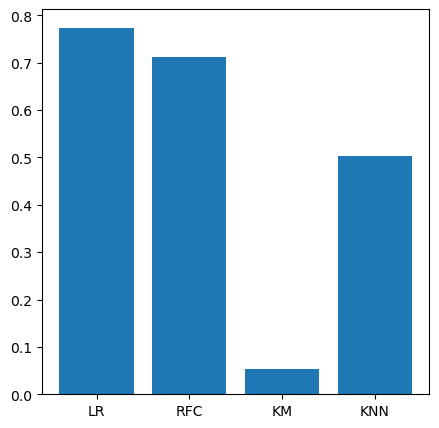

In [24]:
#Графики точности каждой модели
x = ["LR","RFC", "KM", "KNN"]
y = [accuracy_logisticRegr, accuracy_model_tree, accuracy_model_kmeans, accuracy_model_neigh]
plt.figure(figsize=(5,5))
plt.bar(x, y)